# Simulation of heat transfer in 2d plate

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt
import matplotlib.animation as animation

# Parameters for the 2D plate
plate_length = 10
plate_width = 10
num_points_x = 50
num_points_y = 50
dx = plate_length / num_points_x
dy = plate_width / num_points_y
alpha = 0.01
dt = (dx ** 2) / (4 * alpha)
time_steps = 50



# Initial temperature distribution (hotter in the center)
temperature_plate = np.zeros((num_points_x, num_points_y))
center_x, center_y = num_points_x // 2, num_points_y // 2
# Reinitializing the temperature distribution for the simulation
temperature_plate = np.zeros((num_points_x, num_points_y))
temperature_plate[center_x-5:center_x+5, center_y-5:center_y+5] = 100


x = np.linspace(0, plate_length, num_points_x)
y = np.linspace(0, plate_width, num_points_y)
X, Y = np.meshgrid(x, y)

# Function to update the temperature distribution for each frame in the animation
# Adjusting the code to fix the axes in the animation

def update_heat_distribution_fixed_axes(frame, temperature_plate, plot_temperature, plot_gradient, plot_laplacian):
    # Update the temperature based on the heat equation
    new_temperature = temperature_plate.copy()
    for i in range(1, num_points_x - 1):
        for j in range(1, num_points_y - 1):
            new_temperature[i, j] = temperature_plate[i, j] + alpha * dt / dx**2 * (
                    temperature_plate[i+1, j] + temperature_plate[i-1, j] +
                    temperature_plate[i, j+1] + temperature_plate[i, j-1] - 4*temperature_plate[i, j])

    # Update the temperature plate
    temperature_plate[:] = new_temperature

    # Update the 3D temperature plot
    plot_temperature[0].remove()
    plot_temperature[0] = ax1.plot_surface(X, Y, temperature_plate, cmap='hot')

    # Update the gradient vector field
    grad_x, grad_y = np.gradient(temperature_plate, dx, dy)
    plot_gradient.set_UVC(grad_x, grad_y)

    # Update the Laplacian scalar field
    laplacian = np.gradient(grad_x, dx, axis=0) + np.gradient(grad_y, dy, axis=1)
    plot_laplacian[0].remove()
    plot_laplacian[0] = ax3.plot_surface(X, Y, laplacian, cmap='RdBu')

# Creating figure and axes for the animation with fixed axes
fig = plt.figure(figsize=(18, 6))

# 3D Temperature Distribution Plot with fixed axes
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
temp_plot = [ax1.plot_surface(X, Y, temperature_plate, cmap='hot')]
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Temperature')
ax1.set_title('3D Temperature Distribution')
ax1.set_zlim(0, 100)

# Gradient Vector Field Plot with fixed axes
ax2 = fig.add_subplot(1, 3, 2)
grad_x, grad_y = np.gradient(temperature_plate, dx, dy)
Q = ax2.quiver(X, Y, grad_x, grad_y)
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_title('Gradient Vector Field')

# Laplacian Scalar Field 3D Plot with fixed axes
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
laplacian = np.gradient(grad_x, dx, axis=0) + np.gradient(grad_y, dy, axis=1)
laplacian_plot = [ax3.plot_surface(X, Y, laplacian, cmap='RdBu')]
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Laplacian')
ax3.set_title('Laplacian Scalar Field')
ax3.set_zlim(-10, 10)

# Creating the animation with fixed axes
ani = animation.FuncAnimation(fig, update_heat_distribution_fixed_axes, fargs=(temperature_plate, temp_plot, Q, laplacian_plot),
                              frames=50, interval=200)

plt.tight_layout()
plt.show()


# 1d case

In [19]:
import numpy as np
%matplotlib qt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
length = 10  # Length of the rod
alpha = 0.01  # Thermal diffusivity
dx = 0.1  # Space step
dt = 0.01  # Time step
n = int(length/dx)  # Number of spatial points
steps = 200  # Number of time steps

# Initial condition (temperature distribution)
u = np.zeros(n)
u[int(.4 * n):int(.6 * n)] = 10  # Initial heat in the middle of the rod

# Discretization of the heat equation
def heat_equation(u, alpha, dx, dt):
    u_new = u.copy()
    for i in range(1, len(u) - 1):
        u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2*u[i] + u[i-1])
    return u_new

# Simulation
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, length, n), u)

def animate(i):
    global u
    u = heat_equation(u, alpha, dx, dt)
    line.set_ydata(u)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=steps, interval=5, blit=True)
plt.title('Heat Distribution in a 1D Rod')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')
plt.show()


# STEADY-STATE GRAVITY POTENTIAL

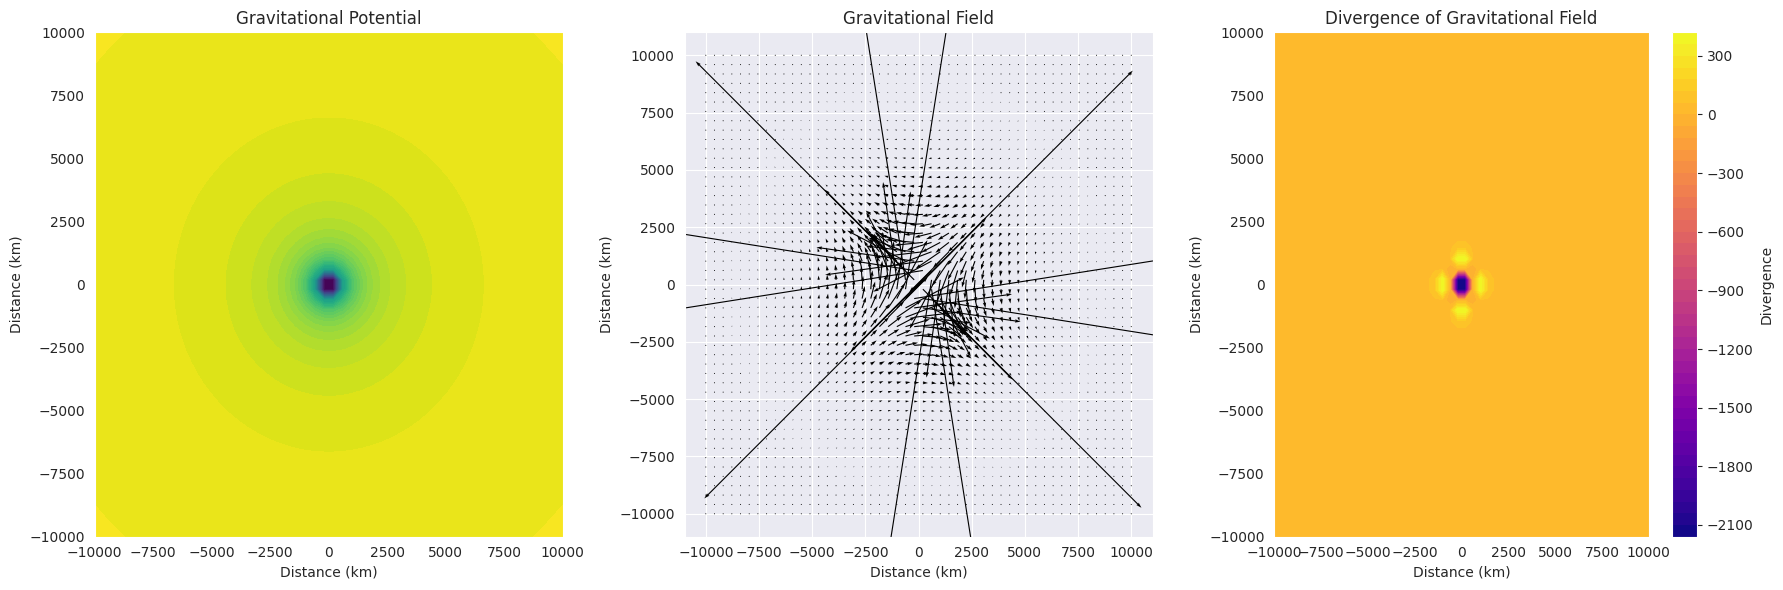

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M = 5.97e24      # Mass of the Earth, kg

# Creating a grid of points (x, y) in the range [-10000 km, 10000 km]
grid_size = 50  # Defines the resolution of the grid
x = np.linspace(-10000e3, 10000e3, grid_size)
y = np.linspace(-10000e3, 10000e3, grid_size)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)  # Distance from the center

# Avoid division by zero for the point at the center
R[R == 0] = np.nan

# Gravitational potential calculation
Phi = -G * M / R

# Gradients of the potential (the gravitational field)
Fx, Fy = np.gradient(-Phi, x[1] - x[0], y[1] - y[0])

# Divergence of the field
divF = np.gradient(Fx, axis=0) + np.gradient(Fy, axis=1)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gravitational potential
axs[0].contourf(X / 1000, Y / 1000, Phi, levels=50, cmap='viridis')
axs[0].set_title('Gravitational Potential')
axs[0].set_xlabel('Distance (km)')
axs[0].set_ylabel('Distance (km)')

# Gravitational field (gradient of potential)
axs[1].quiver(X / 1000, Y / 1000, Fx, Fy)
axs[1].set_title('Gravitational Field')
axs[1].set_xlabel('Distance (km)')
axs[1].set_ylabel('Distance (km)')

# Divergence of the field
div_plot = axs[2].contourf(X / 1000, Y / 1000, divF, levels=50, cmap='plasma')
fig.colorbar(div_plot, ax=axs[2], label='Divergence')
axs[2].set_title('Divergence of Gravitational Field')
axs[2].set_xlabel('Distance (km)')
axs[2].set_ylabel('Distance (km)')

plt.tight_layout()
plt.show()
